<a href="https://colab.research.google.com/github/cmshebeeb/Mining-Quality-Prediction/blob/main/Mining_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code for Mining Project**

###Load the dataset (MiningProcess_Flotation_Plant_Database.csv) from Drive/Colab Notebooks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MiningProcess_Flotation_Plant_Database.csv', decimal=',', on_bad_lines='skip')
#print(df.head())
#print(df.info())
print(df.shape)

Mounted at /content/drive
(737453, 24)


#Checking the Data

###Checking is there any missing values

In [ ]:
print("Missing values of each column:")
print(df.isnull().sum())
print("\nData types of each column:")
print(df.dtypes)
features = df.columns.drop('% Silica Concentrate').tolist()
print("Selected features:", features)
print("Note: Will test excluding '% Iron Concentrate' due to correlation.")

Missing values of each column:
date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

Data types of each column:
date                             object
% Iron Feed                     float64
% Silica Feed                   

*Selected all columns except % Silica Concentrate (target) as features. Will test models with and without % Iron Concentrate due to its high correlation with the target*

###Plot Hostogram of % Silica Concentrate

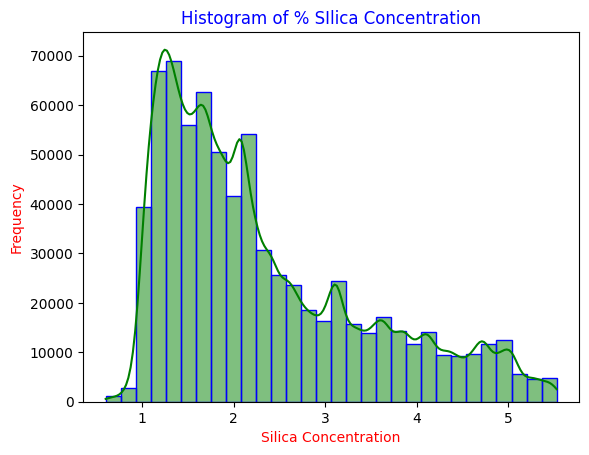

In [ ]:
#for i in df.columns.tolist():
#  print(i)
#lis1=sorted(df['% Silica Concentrate'].unique().tolist())
#for i in (lis1):
#  print(i)

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['% Silica Concentrate'], bins= 30,kde=True, color='Green', edgecolor='Blue')
plt.title('Histogram of % SIlica Concentration', color='blue')
plt.xlabel('Silica Concentration', color='red')
plt.ylabel('Frequency', color='red')
plt.show()


*The histogram of % Silica Concentration reveals a right-skewed distribution. Most values fall between 0.5% and 2.5%, with a peak around 1.0%. The frequency declines steadily as concentration increases, indicating fewer high-silica samples.*

#Linear Regression model

Linear Regression model for this Project using all features except % Silica Concentrate (target) and date (non-numeric)

Split data (80% train, 20% test) → train model → predict on test → scatter plot actual vs predicted

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df.drop(['% Silica Concentrate','date'], axis=1)
y=df['% Silica Concentrate']
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
model= LinearRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print("Linear regression training successfully completed")


Linear regression training successfully completed


Create a scatter plot comparing actual vs. predicted % Silica Concentrate using matplotlib.

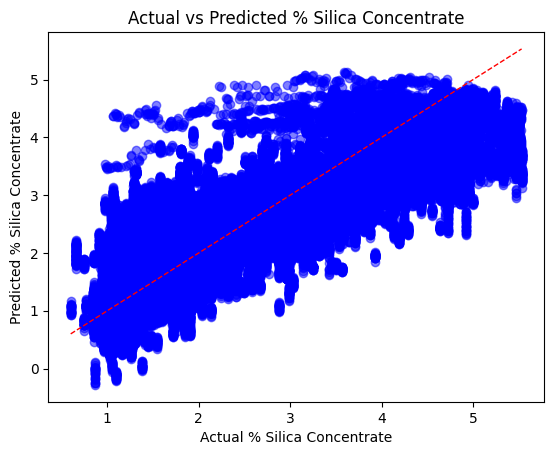

In [ ]:
plt.scatter(y_test,y_pred, color= 'blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.title('Actual vs Predicted % Silica Concentrate')
plt.xlabel('Actual % Silica Concentrate')
plt.ylabel('Predicted % Silica Concentrate')
plt.show()

- The scatter plot shows a moderate to strong linear relationship between actual and predicted values, indicating the model captures the trend reasonably well.
- Most data points are clustered around the red dashed line (y = x), suggesting good prediction accuracy for a majority of samples.
- A few points deviate noticeably from the ideal line, indicating some prediction errors—possibly due to outliers or unmodeled complexity.
- The model appears to generalize well on the test set, with no obvious signs of severe underfitting or overfitting.
- The spread of points is fairly symmetric, implying that the model doesn't consistently overpredict or underpredict across the range.
- The linear regression model is simple and interpretable, making it a good baseline for silica concentrate prediction.
- Dropping the date column was appropriate, as it likely didn't contribute meaningful predictive power and could introduce noise.
- The visualization is effective for quick diagnostic assessment, but further evaluation using metrics like R², MAE, and RMSE would provide quantitative validation.
